# Part 2: MLP Network Training

# WITHOUT DATA AUGMENTATION

True
Files already downloaded and verified
Files already downloaded and verified
Epoch count:  0
0 3399.7873883247375 31.4
Epoch count:  1
1 3334.1789504289627 33.44
Epoch count:  2
2 3300.967092037201 35.18
Epoch count:  3
3 3271.2581357955933 36.46
Epoch count:  4
4 3245.7100363969803 37.61
Epoch count:  5
5 3223.2098395824432 38.28
Epoch count:  6
6 3201.7713479995728 39.33
Epoch count:  7
7 3181.1721490621567 39.41
Epoch count:  8
8 3161.724555373192 40.87
Epoch count:  9
9 3145.1910370588303 40.7
Epoch count:  10
10 3128.926750898361 41.59
Epoch count:  11
11 3114.411834001541 41.51
Epoch count:  12
12 3099.7949509620667 41.61
Epoch count:  13
13 3086.1088215112686 42.31
Epoch count:  14
14 3073.735729932785 42.59
Epoch count:  15
15 3061.9828255176544 42.6
Epoch count:  16
16 3049.5346027612686 42.97
Epoch count:  17
17 3038.6576367616653 43.03
Epoch count:  18
18 3028.0425633192062 42.71
Epoch count:  19
19 3017.3622794151306 43.3
Epoch count:  20
20 3007.2455936670303 43.24
Epo

/home/felixng/repos/rbe474x/Group5_p4/.venv/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


21 2997.8809045553207 43.16
Epoch count:  22
22 2989.9642033576965 43.25
Epoch count:  23
23 2979.2305154800415 43.03
Epoch count:  24
24 2971.6551084518433 43.76
Epoch count:  25
25 2962.2990951538086 43.8
Epoch count:  26
26 2954.2036954164505 43.5
Epoch count:  27
27 2946.485689640045 43.65
Epoch count:  28
28 2938.9208155870438 44.0
Epoch count:  29
29 2931.6570632457733 43.98
Epoch count:  30
30 2923.5397593975067 43.98
Epoch count:  31
31 2917.9075186252594 43.85
Epoch count:  32
32 2911.2962275743484 43.71
Epoch count:  33
33 2906.539709210396 43.9
Epoch count:  34
34 2900.5667394399643 44.24
Epoch count:  35
35 2894.0683344602585 43.51
Epoch count:  36
36 2888.7580832242966 44.54
Epoch count:  37
37 2884.6847780942917 44.16
Epoch count:  38
38 2880.5433284044266 44.31
Epoch count:  39
39 2874.033798098564 44.05


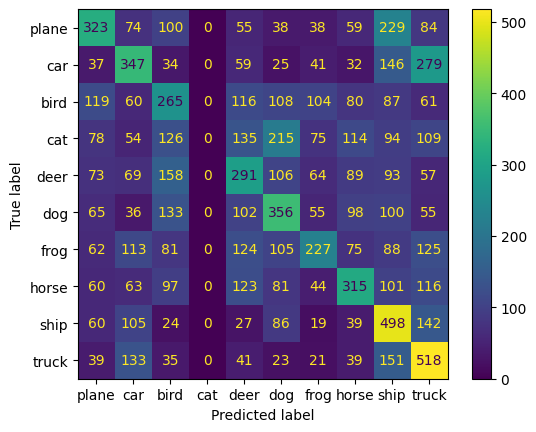

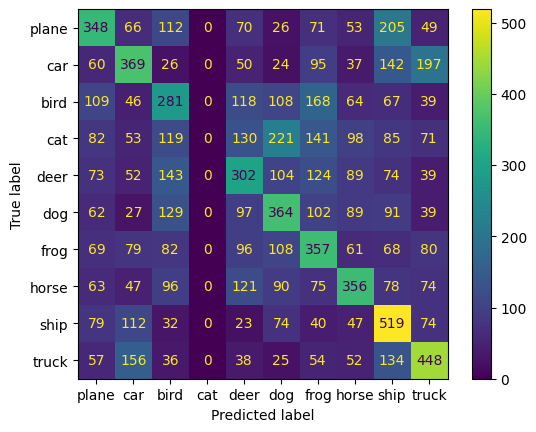

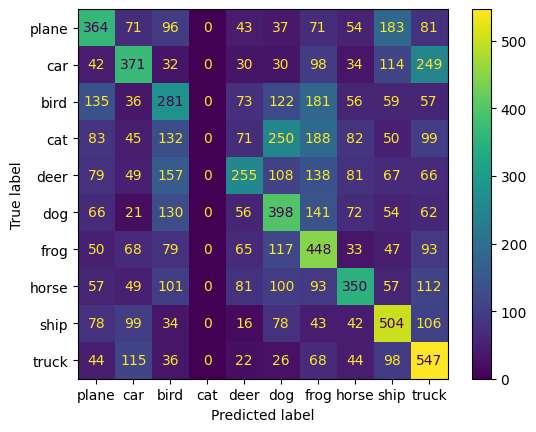

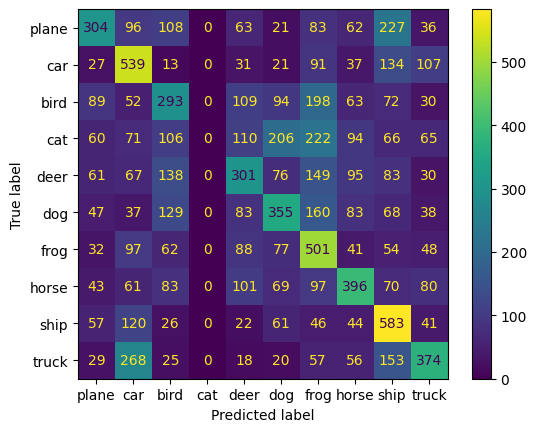

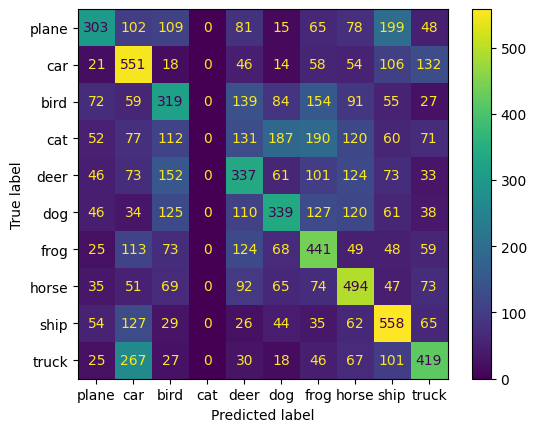

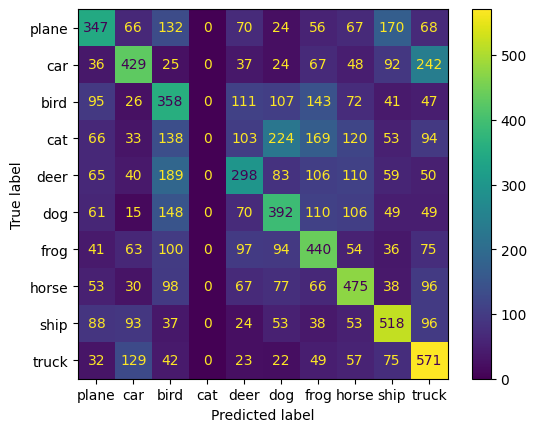

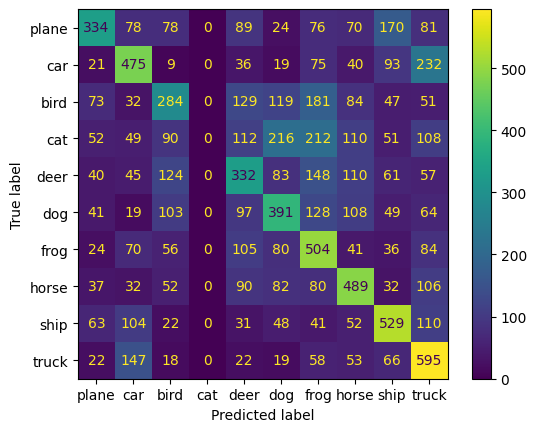

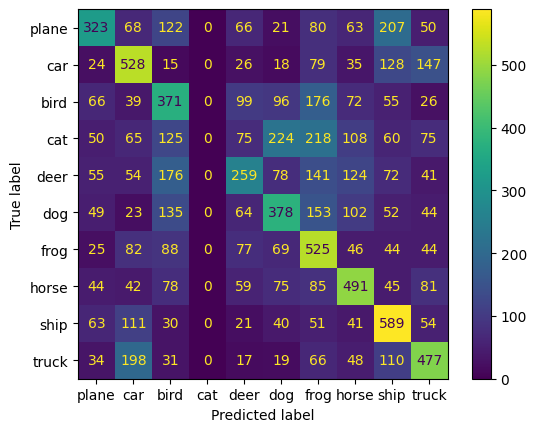

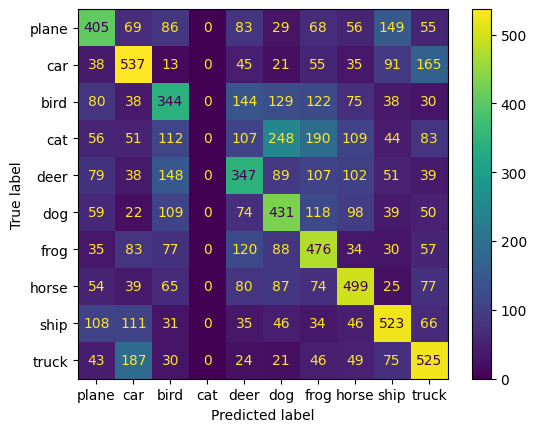

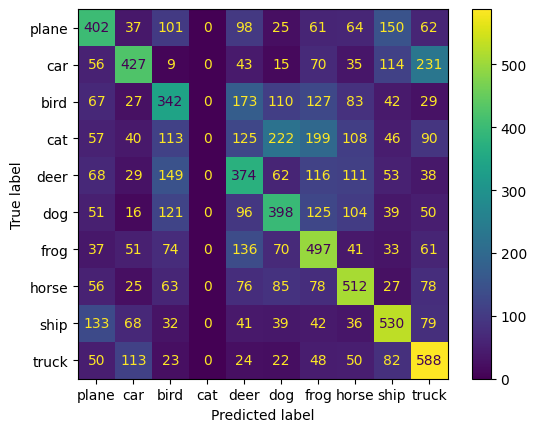

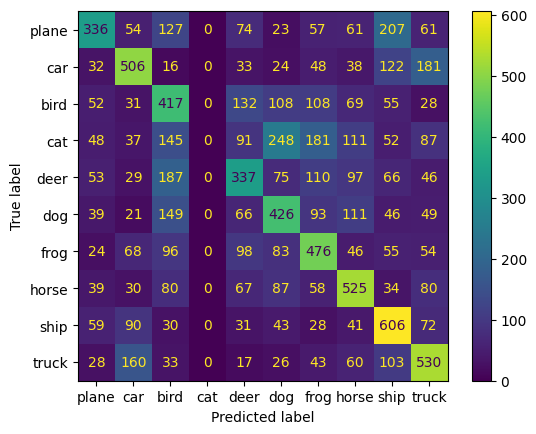

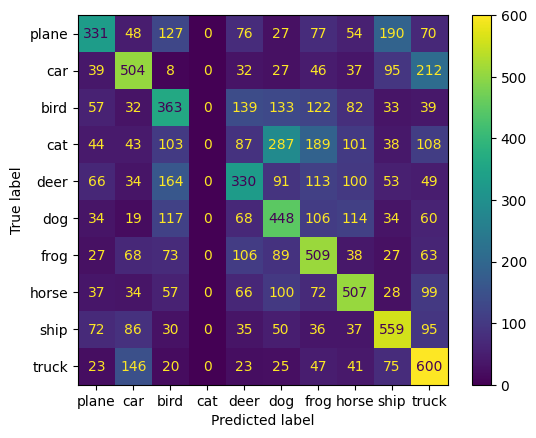

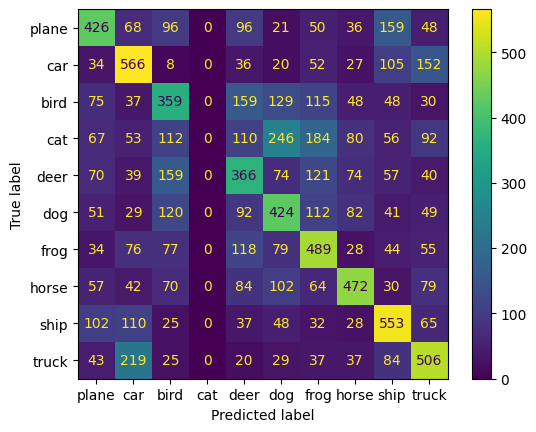

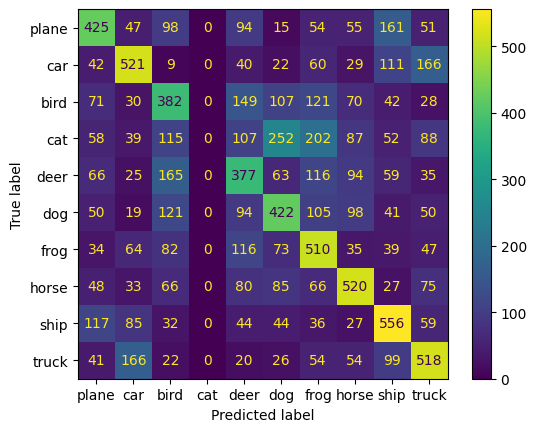

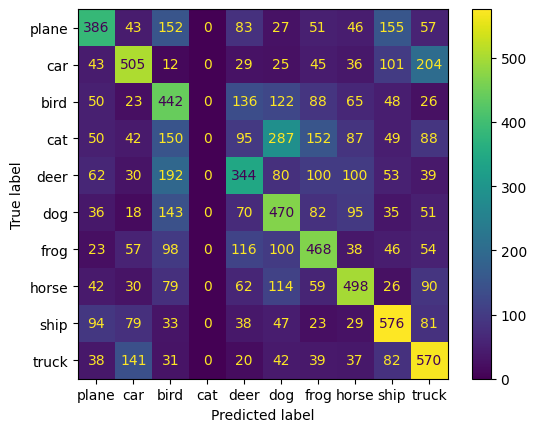

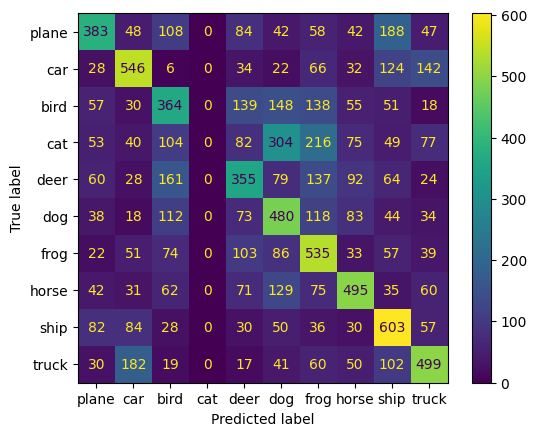

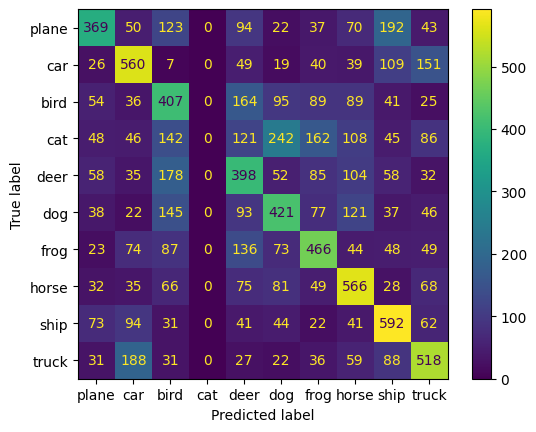

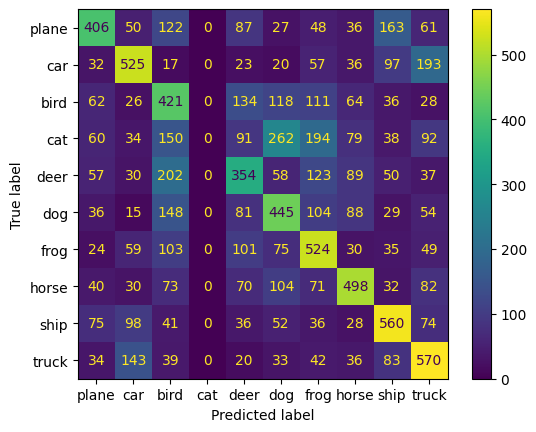

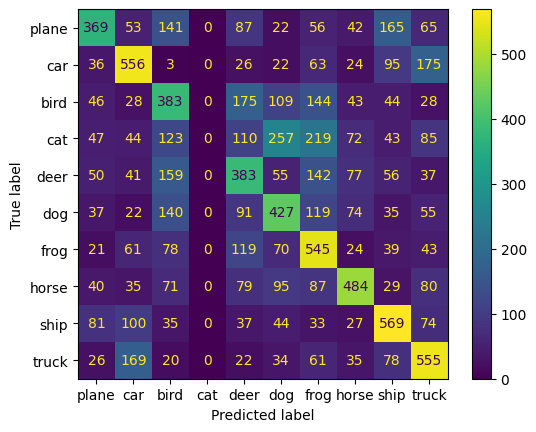

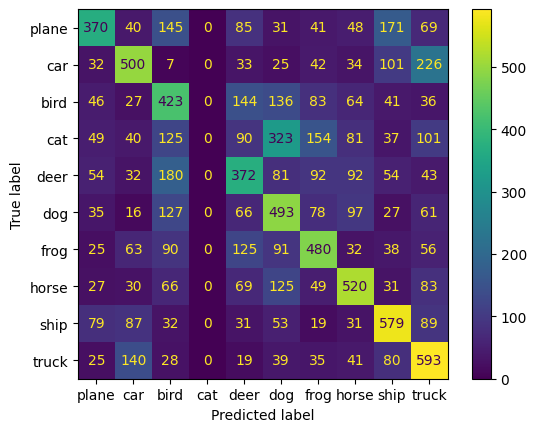

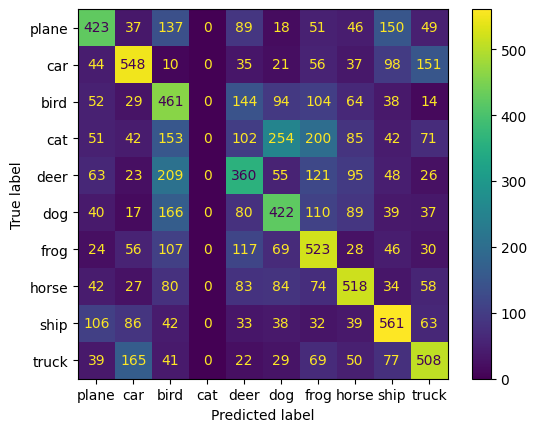

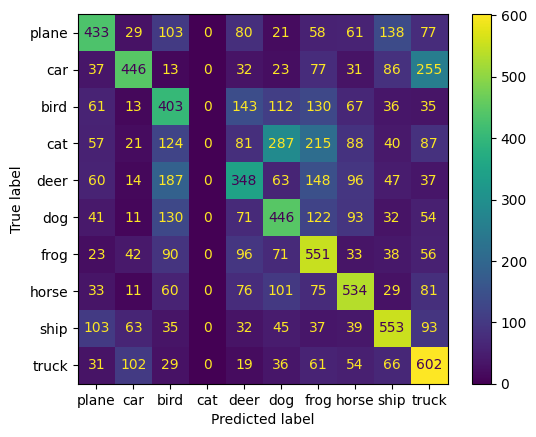

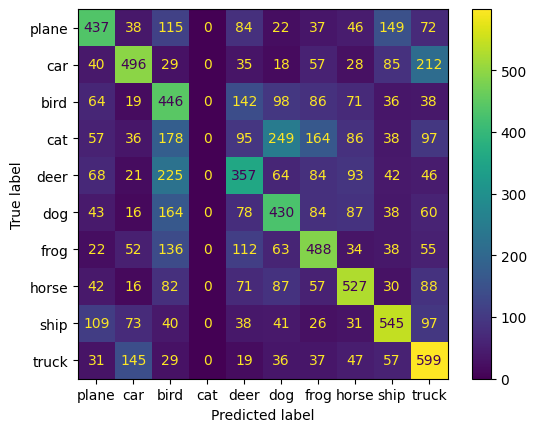

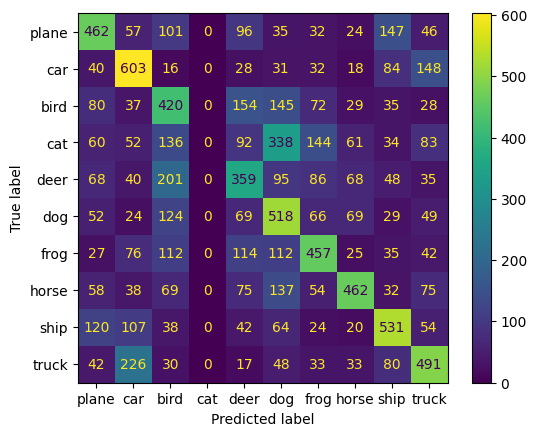

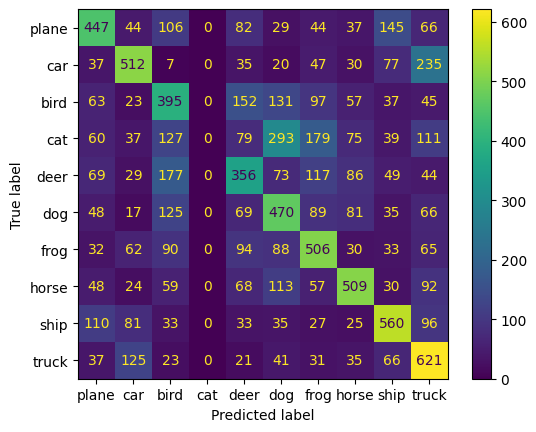

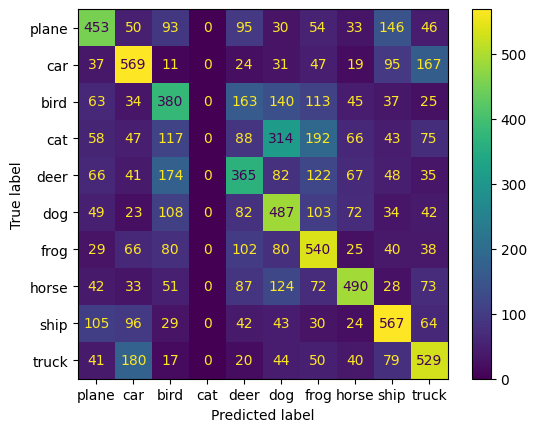

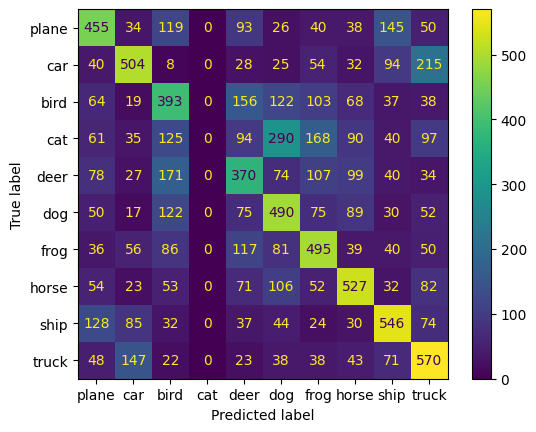

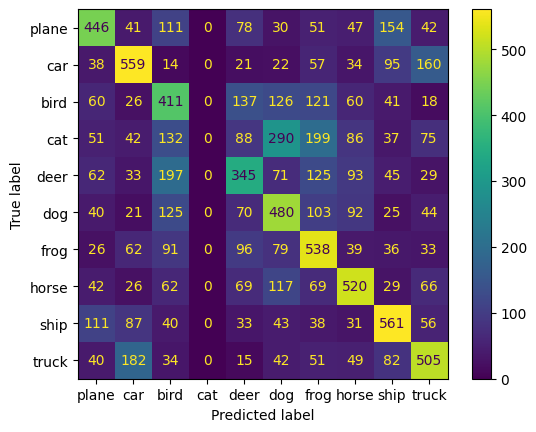

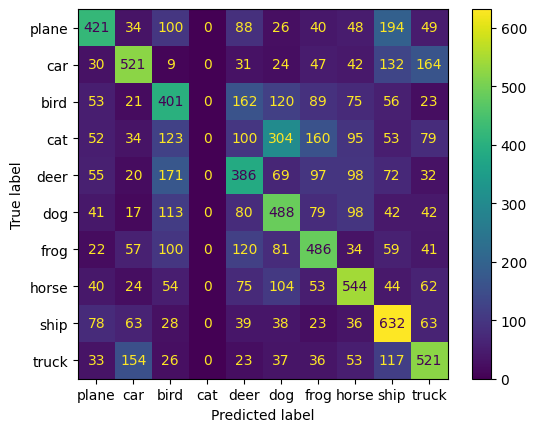

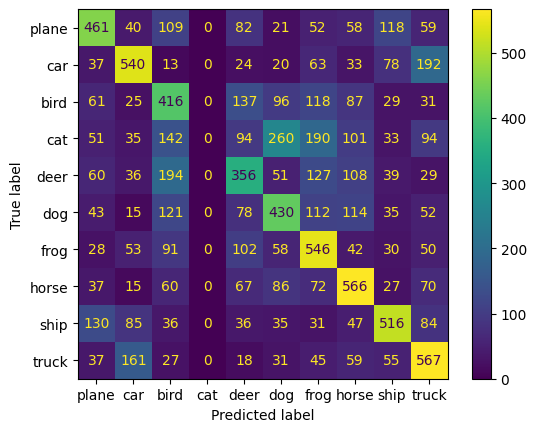

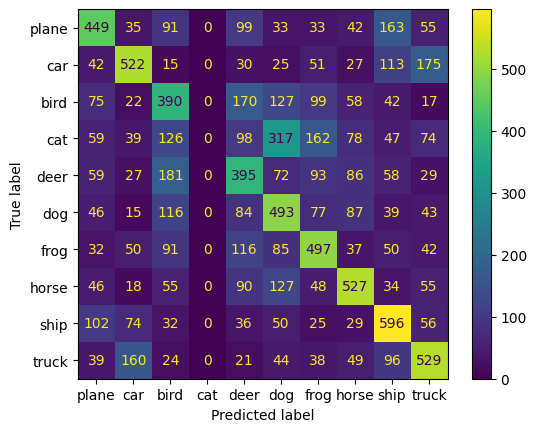

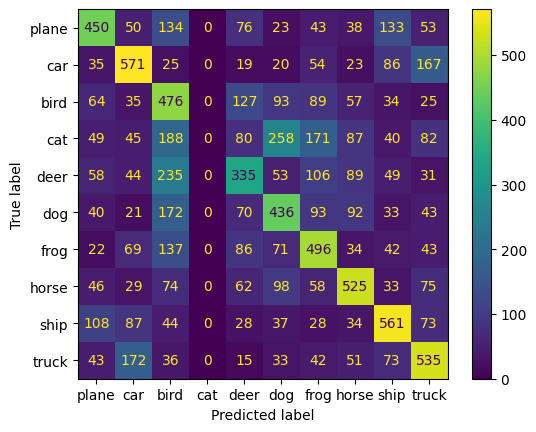

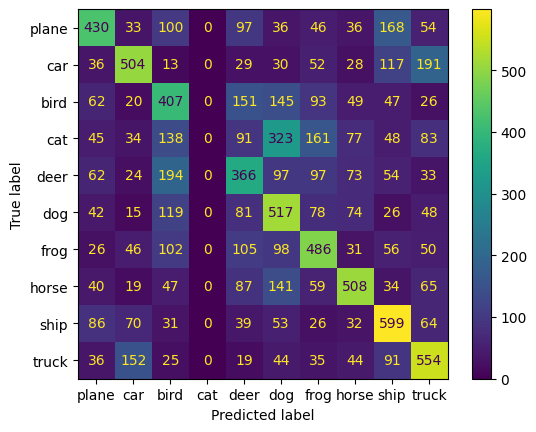

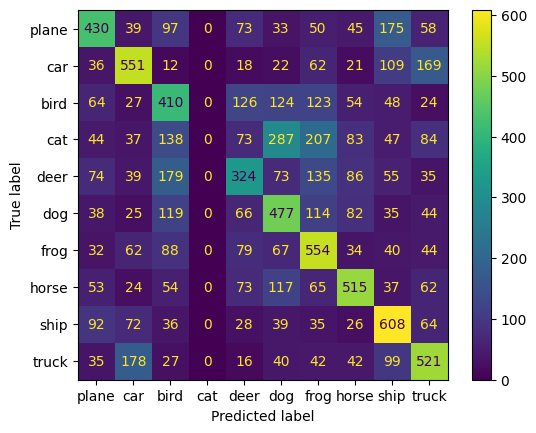

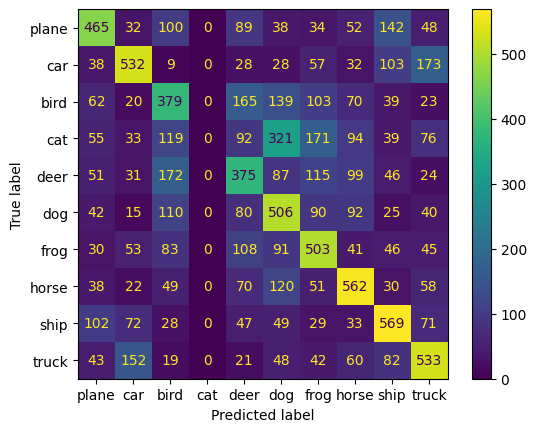

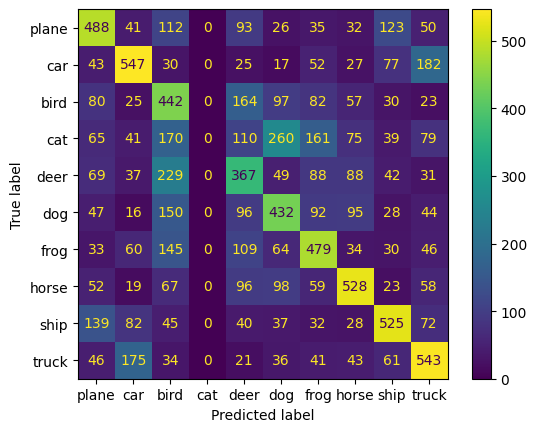

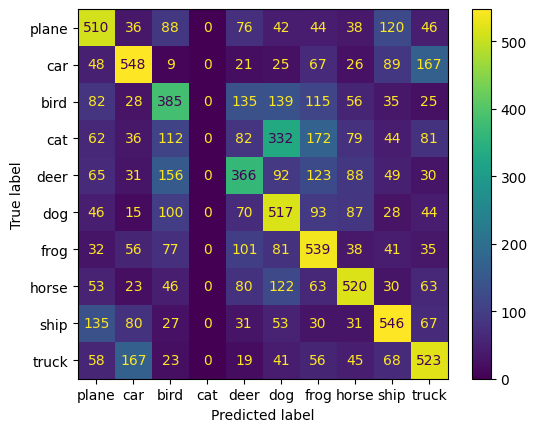

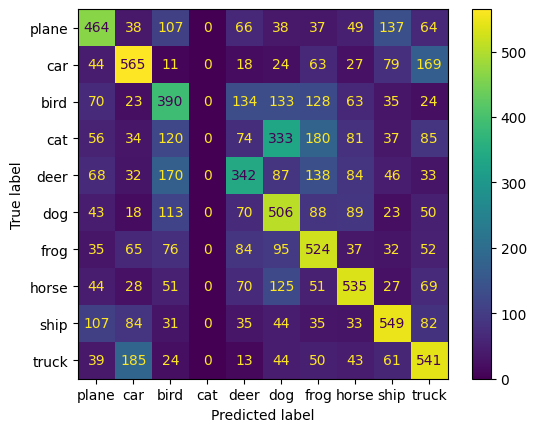

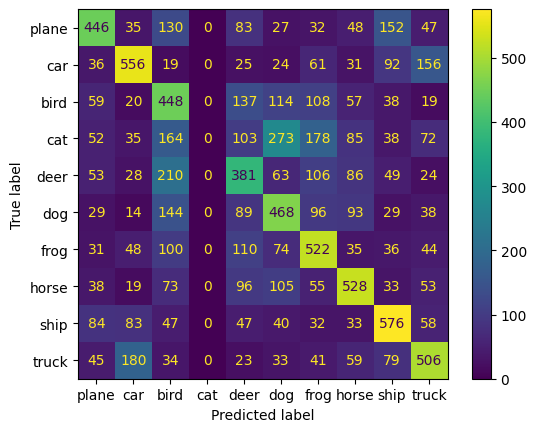

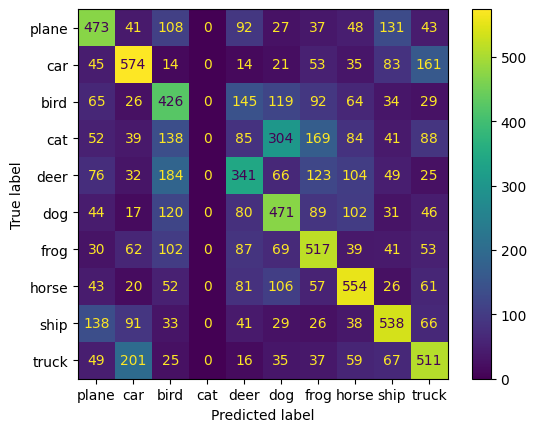

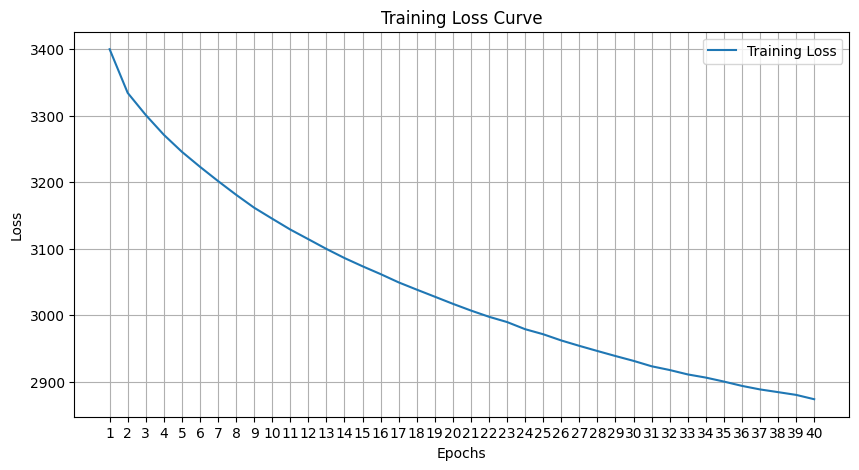

In [1]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision

importlib.reload(net)

print(torch.cuda.is_available())
pipeline = net.Pipeline()

model = net.CustomMLP().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER = os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/mlp/")

import os

os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []
for eIndex in range(epochs):
    print("Epoch count: ", eIndex)
    train_epochloss = pipeline.train_step(model, optimizer)
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), trainLosses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

np.savetxt("train.log", trainLosses)
np.savetxt("test.log", testAccuracies)

## WITH DATA AUGMENTATION

True
Files already downloaded and verified
Files already downloaded and verified
Epoch count:  0
0 6973.12982237339 31.31
Epoch count:  1
1 6878.906025767326 33.19
Epoch count:  2
2 6836.196155309677 34.3
Epoch count:  3
3 6803.192404747009 35.48
Epoch count:  4
4 6771.675722122192 36.65
Epoch count:  5
5 6742.090371608734 37.21
Epoch count:  6
6 6713.414150238037 38.06
Epoch count:  7
7 6687.886699914932 38.19
Epoch count:  8
8 6664.67690718174 38.33
Epoch count:  9
9 6642.097113490105 39.29
Epoch count:  10
10 6619.259499430656 39.73
Epoch count:  11
11 6599.632691860199 39.28
Epoch count:  12
12 6578.708015918732 39.16
Epoch count:  13
13 6558.243768334389 39.88
Epoch count:  14
14 6538.76563847065 39.8
Epoch count:  15
15 6519.36123752594 39.89
Epoch count:  16
16 6503.2220722436905 40.01
Epoch count:  17
17 6484.050588846207 40.15
Epoch count:  18
18 6467.322491288185 40.69
Epoch count:  19
19 6448.287125825882 40.08
Epoch count:  20
20 6431.920564174652 40.33
Epoch count:  21


/home/felixng/repos/rbe474x/Group5_p4/.venv/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


21 6415.532198548317 40.73
Epoch count:  22
22 6400.604397773743 40.33
Epoch count:  23
23 6383.05982029438 40.59
Epoch count:  24
24 6369.317634940147 40.95
Epoch count:  25
25 6353.515262722969 41.22
Epoch count:  26
26 6339.083628535271 40.78
Epoch count:  27
27 6324.782024741173 40.61
Epoch count:  28
28 6312.0126349925995 39.81
Epoch count:  29
29 6298.717121124268 41.03
Epoch count:  30
30 6284.7109578847885 40.6
Epoch count:  31
31 6272.687925577164 40.95
Epoch count:  32
32 6259.956077098846 41.22
Epoch count:  33
33 6247.200160861015 40.6
Epoch count:  34
34 6235.040634036064 39.89
Epoch count:  35
35 6221.696787595749 40.65
Epoch count:  36
36 6213.982270598412 40.72
Epoch count:  37
37 6201.843710184097 40.8
Epoch count:  38
38 6194.6247400045395 41.06
Epoch count:  39
39 6180.342586398125 41.14


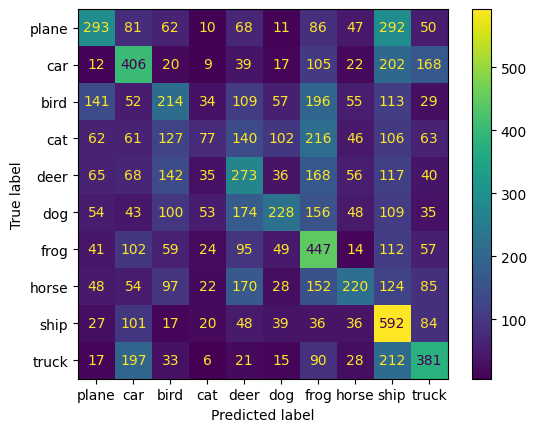

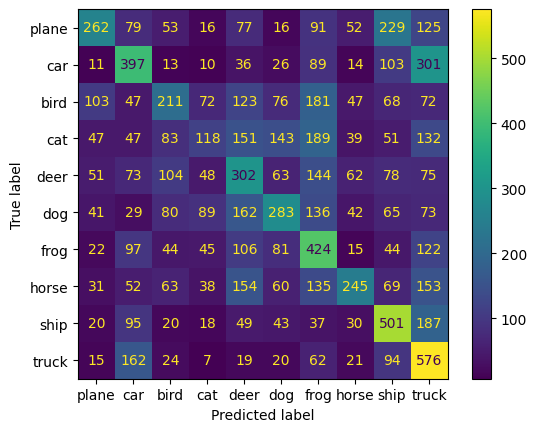

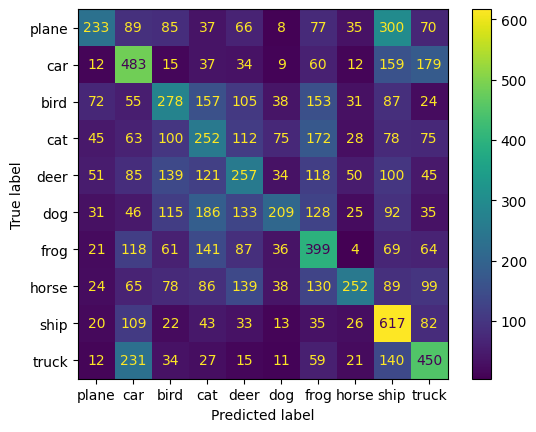

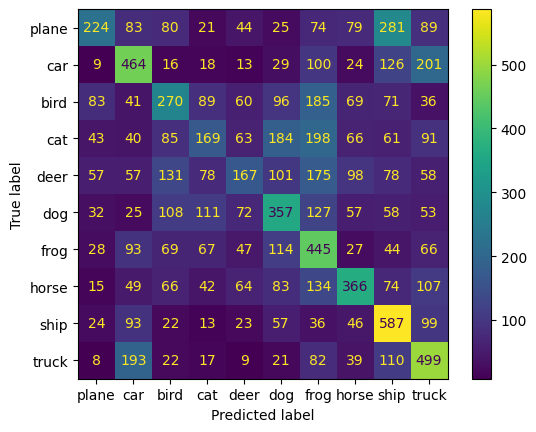

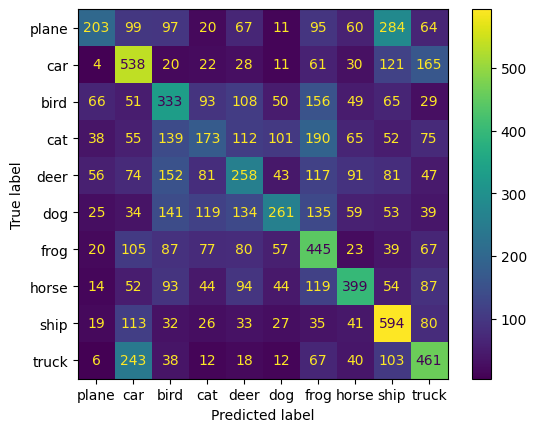

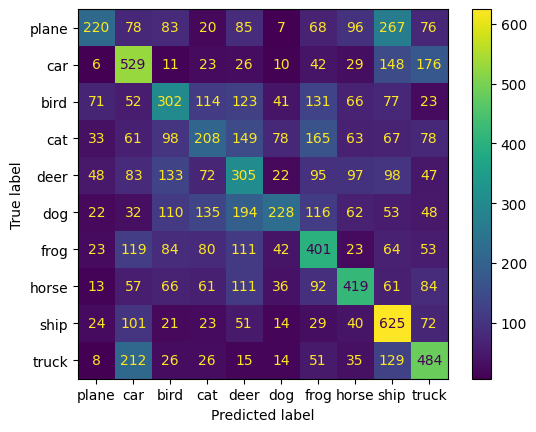

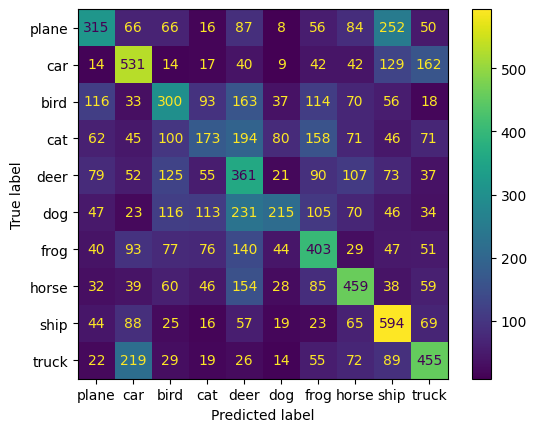

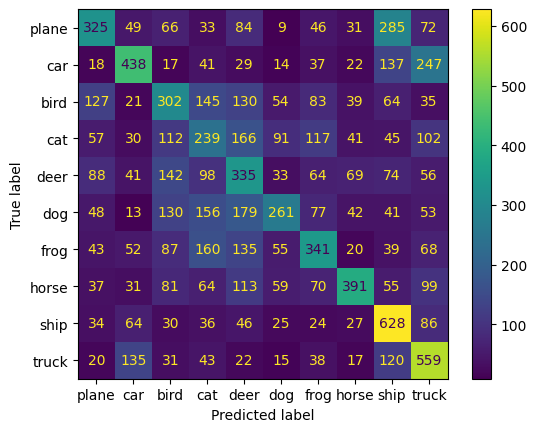

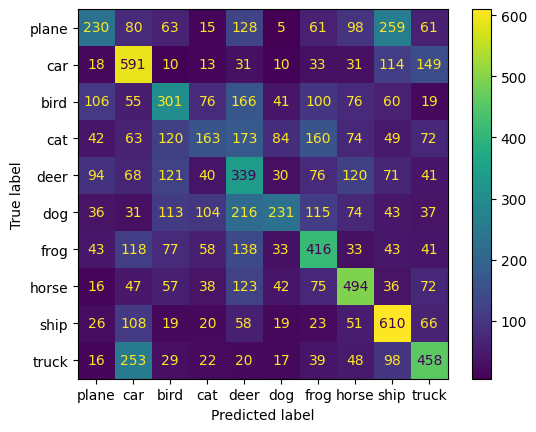

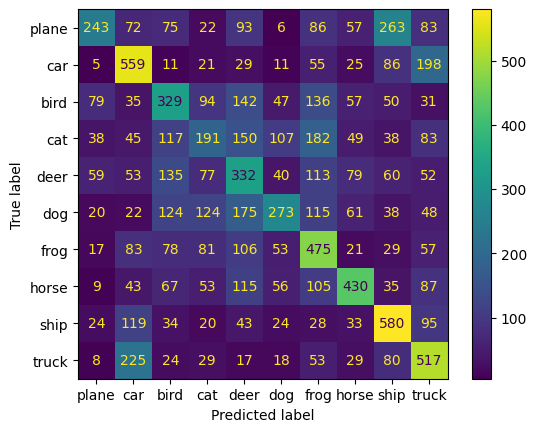

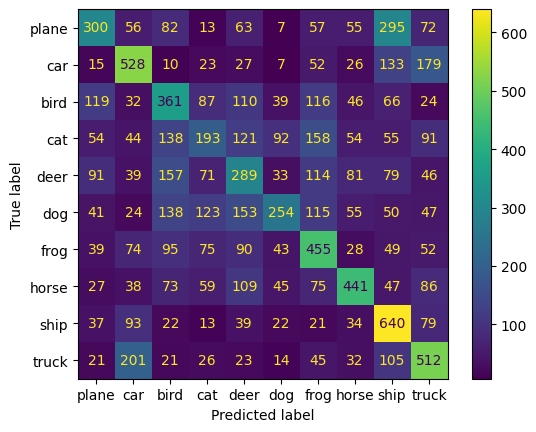

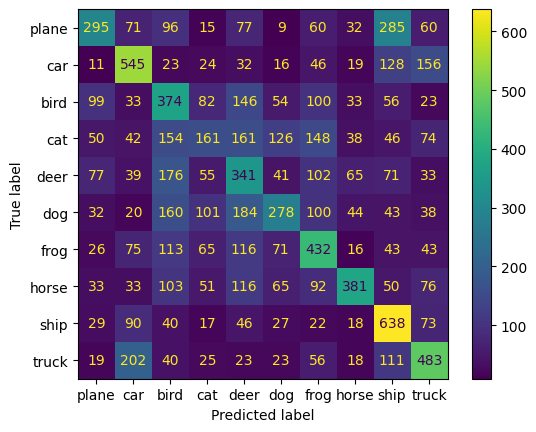

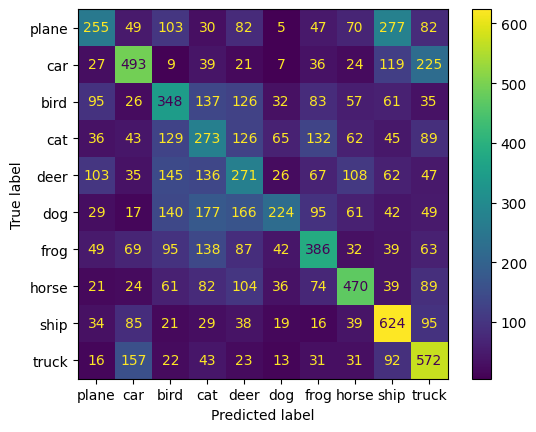

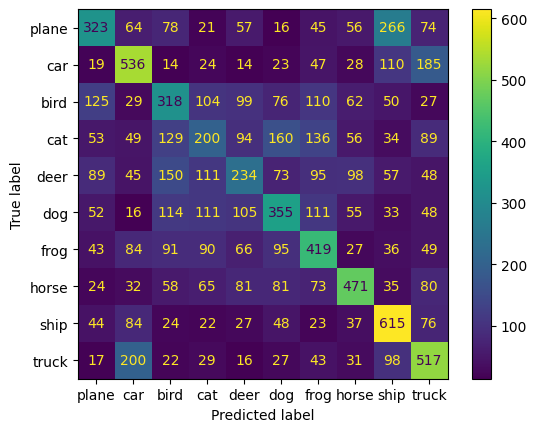

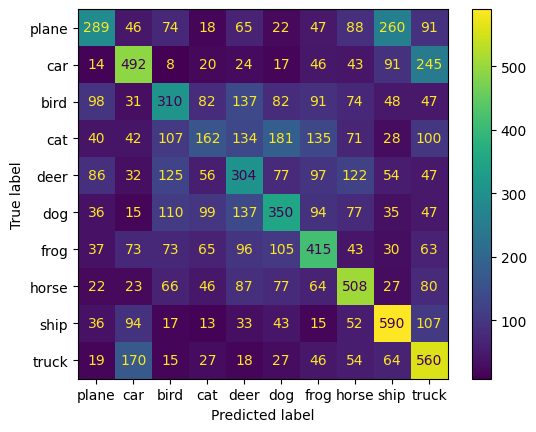

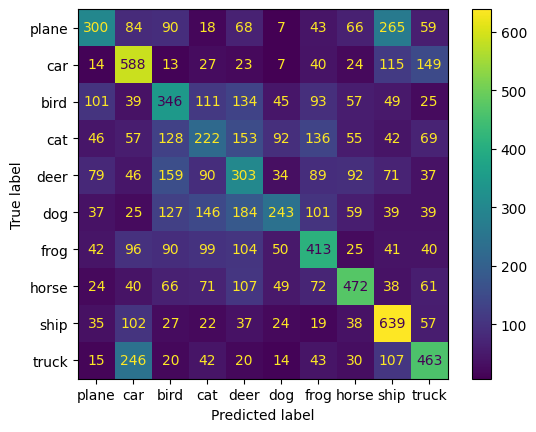

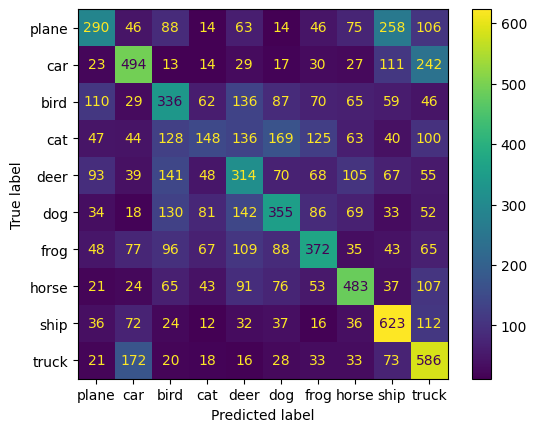

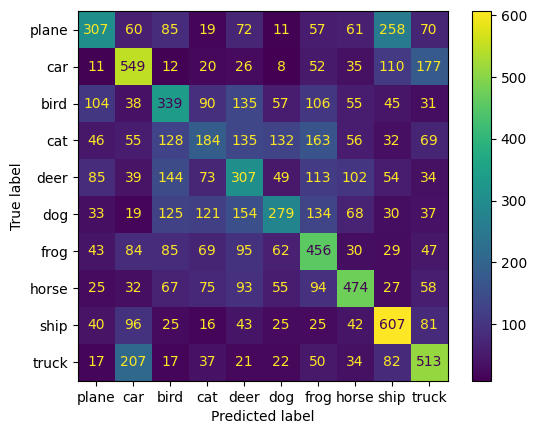

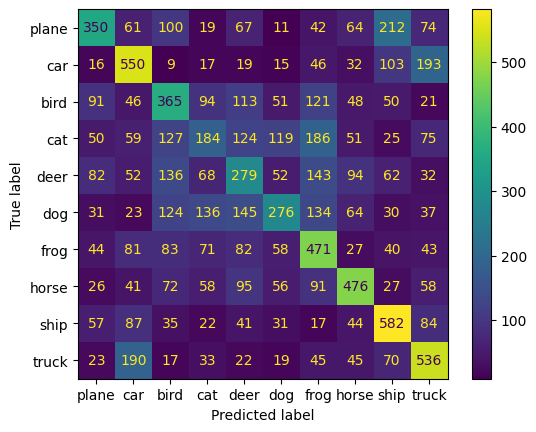

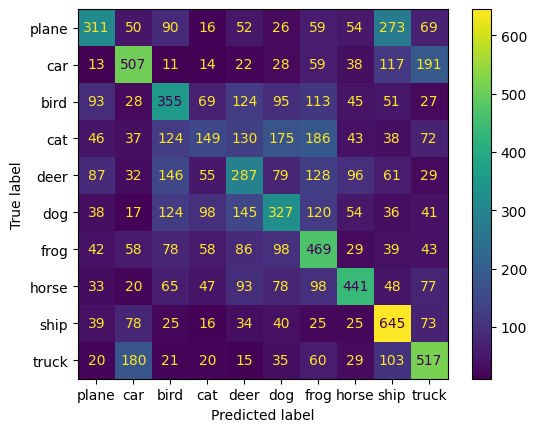

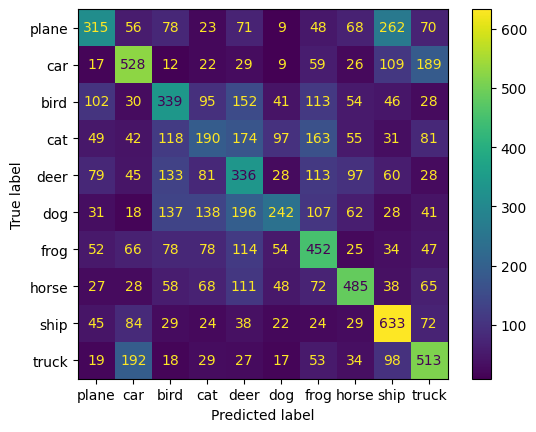

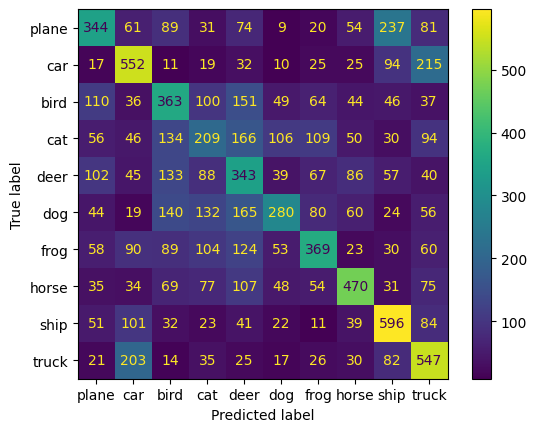

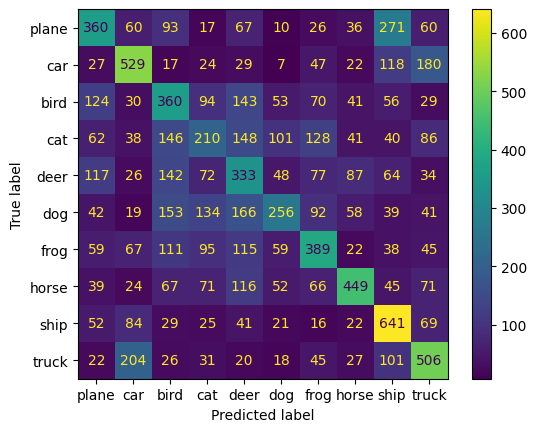

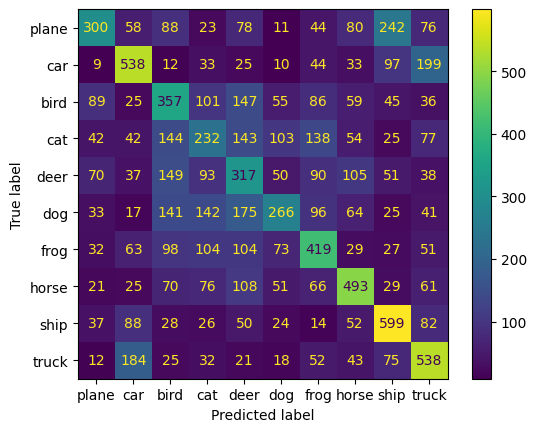

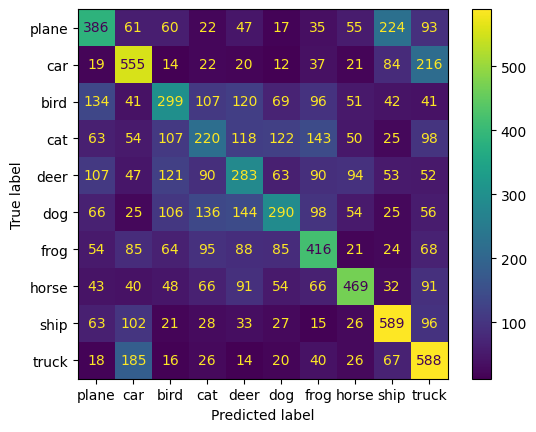

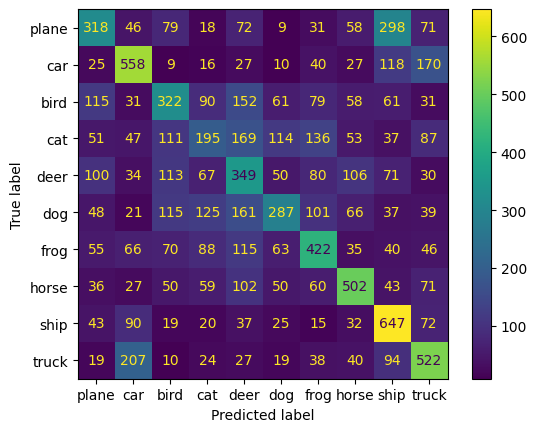

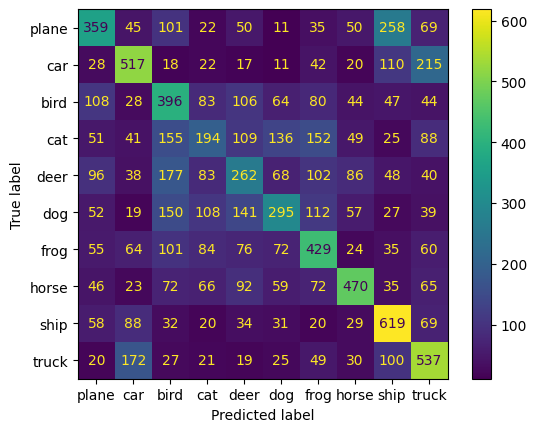

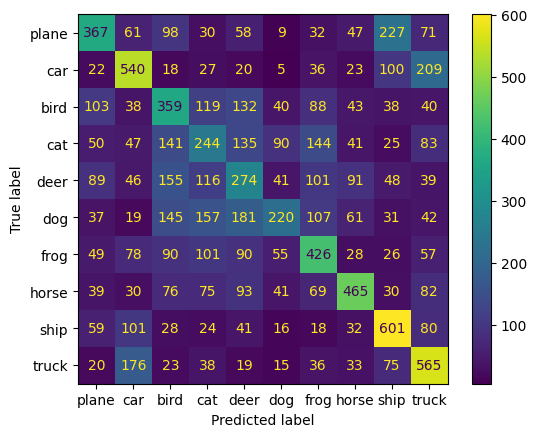

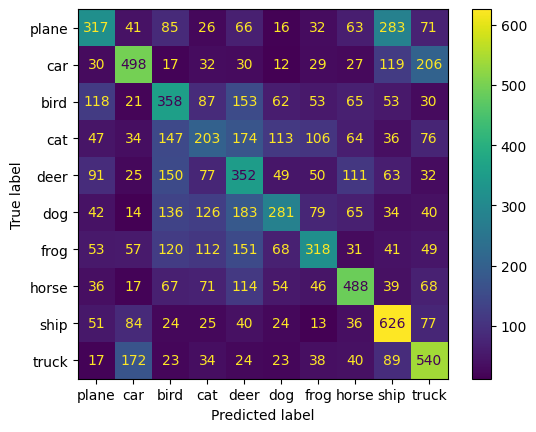

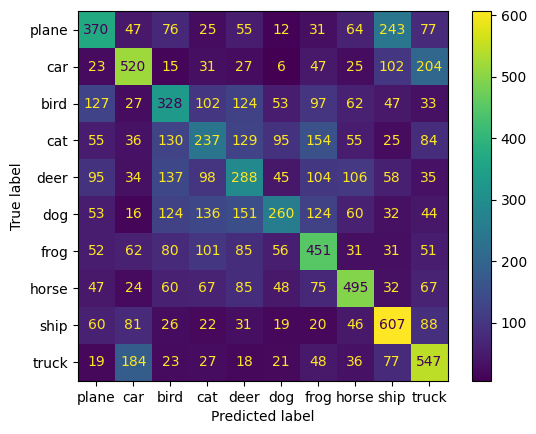

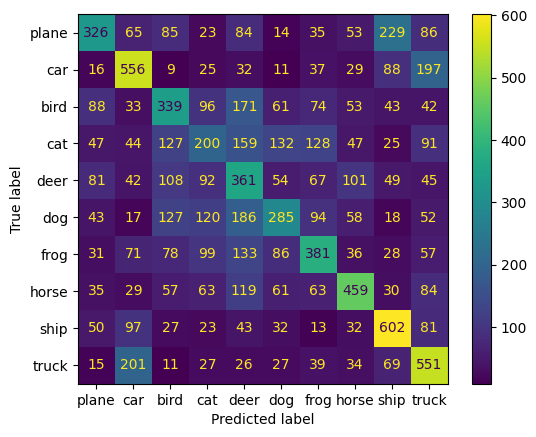

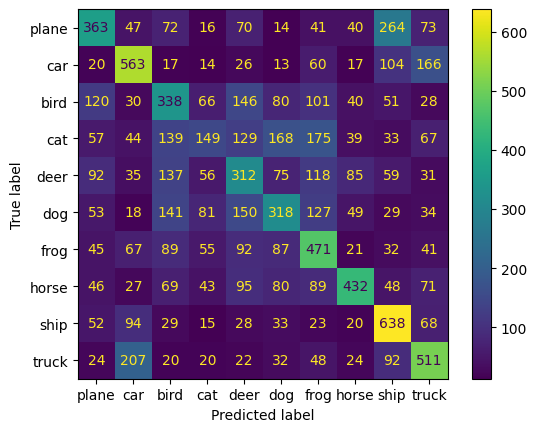

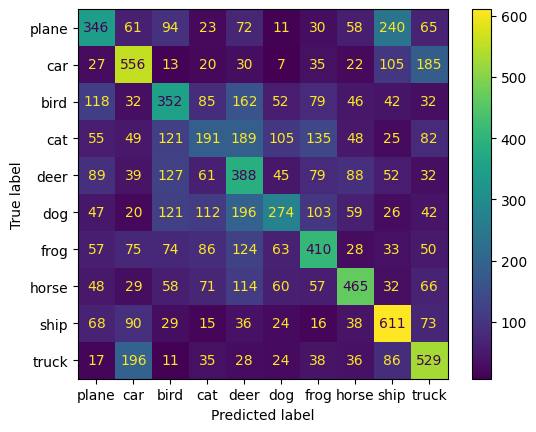

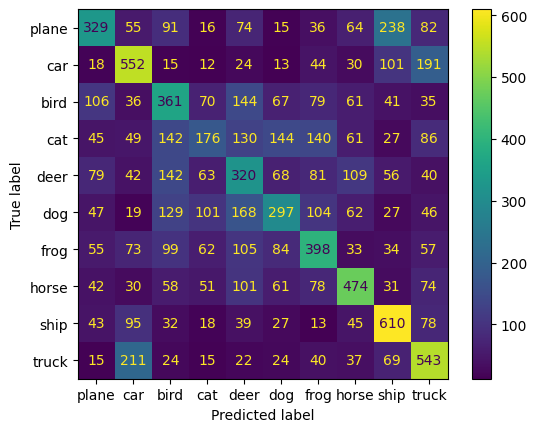

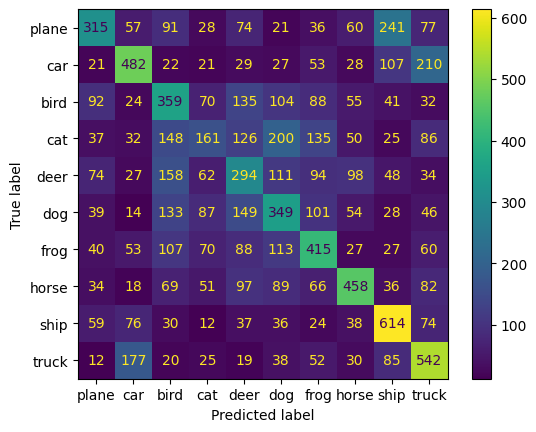

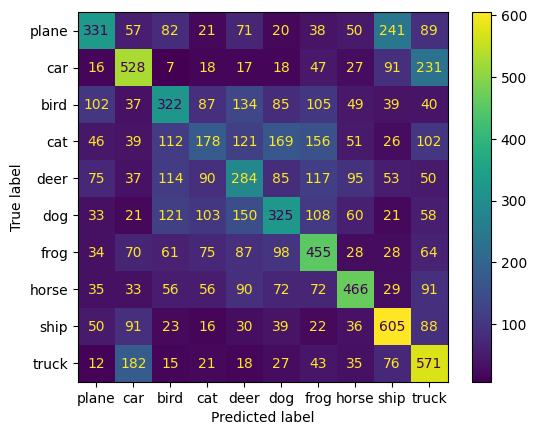

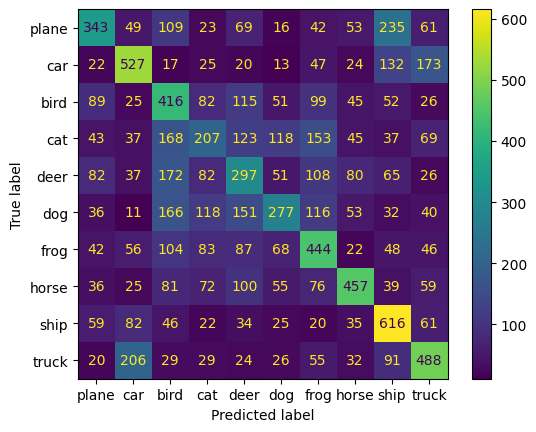

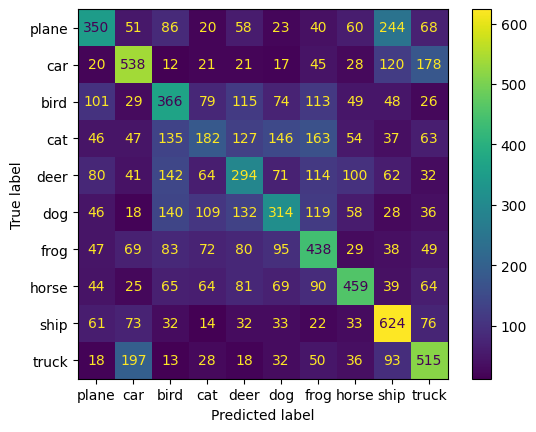

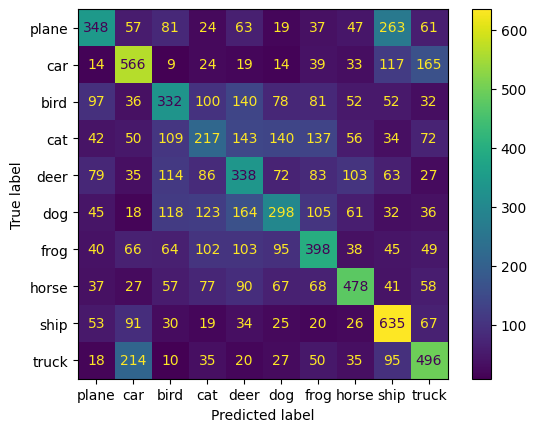

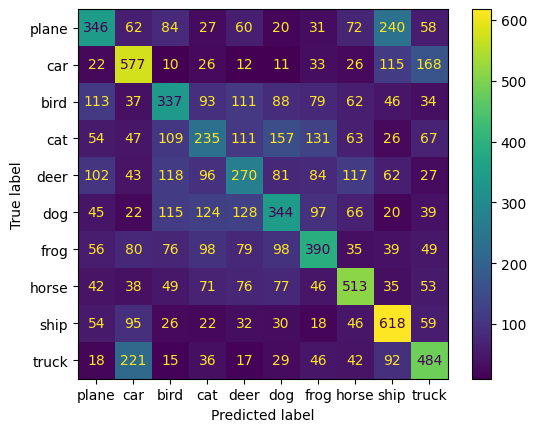

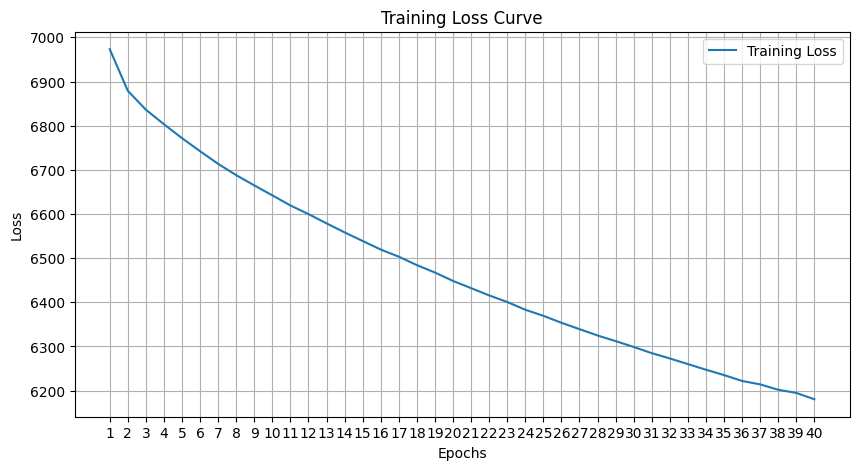

In [2]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision

importlib.reload(net)

print(torch.cuda.is_available())
data_transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)
augmented_dataset = torchvision.datasets.ImageFolder(
    root="../GeneratedImgs/101/101/", transform=data_transform
)
# augmented_dataset_loader = torch.utils.data.DataLoader(
#     augmented_dataset, batch_size=32, num_workers=4, shuffle=True
# )

# WITH DATA AUGMENTATION !!!!!!!!!!!!!!
# pass in data loader
pipeline = net.Pipeline(synthetic_dataset=augmented_dataset)
# pipeline = net.Pipeline()

model = net.CustomMLP().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER = os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/mlp/")

import os

os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []
for eIndex in range(epochs):
    print("Epoch count: ", eIndex)
    train_epochloss = pipeline.train_step(model, optimizer)
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), trainLosses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

np.savetxt("train.log", trainLosses)
np.savetxt("test.log", testAccuracies)